# --- SVR aplicado a predicción de precios de viviendas ---

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Carga de los datos al modelo
ruta = "C://CodigosVisual//InteligenciaArtificial//Informe2//House_Price_Prediction_Dataset.csv"
df = pd.read_csv(ruta)

df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
# 3. Limpieza de los datos del dataset que tenemos

print("Valores nulos por columna:\n", df.isnull().sum())

# Elimino filas con valores nulos
df_clean = df.dropna()

# Elimino columnas que no sirven para predecir
df_clean = df_clean.drop(columns=["Id"])

Valores nulos por columna:
 Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [ ]:
# 4. Codificación de variables categóricas

# One-Hot Encoding 
df_encoded = pd.get_dummies(df_clean, columns=["Location", "Condition", "Garage"], drop_first=True)

df_encoded.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,1360,5,4,3,1970,149919,False,False,False,False,False,False,False
1,4272,5,4,3,1958,424998,False,False,False,False,False,False,False
2,3592,2,2,3,1938,266746,False,False,False,False,True,False,False
3,966,4,2,2,1902,244020,False,True,False,True,False,False,True
4,4926,1,4,2,1975,636056,False,False,False,True,False,False,True


In [ ]:
# 5. Normalización de variables

num_cols = ["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt"]
scaler = MinMaxScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_encoded.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,0.190974,1.00,1.000000,1.0,0.569106,149919,False,False,False,False,False,False,False
1,0.838373,1.00,1.000000,1.0,0.471545,424998,False,False,False,False,False,False,False
2,0.687194,0.25,0.333333,1.0,0.308943,266746,False,False,False,False,True,False,False
3,0.103379,0.75,0.333333,0.5,0.016260,244020,False,True,False,True,False,False,True
4,0.983771,0.00,1.000000,0.5,0.609756,636056,False,False,False,True,False,False,True


In [ ]:
# 6. Train/test

X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (1600, 12)
Shape X_test: (400, 12)
Shape y_train: (1600,)
Shape y_test: (400,)


In [ ]:
# 7. Entrenamiento del modelo

# Configuración para esto
svr = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

# Entrenamiento
svr.fit(X_train, y_train)

# Predicciones
y_pred = svr.predict(X_test)

In [ ]:
# 8. Revisión del modelo

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE en test:", mse)
print("R^2 en test:", r2)

MSE en test: 77893172327.45227
R^2 en test: -0.0012126636010818537


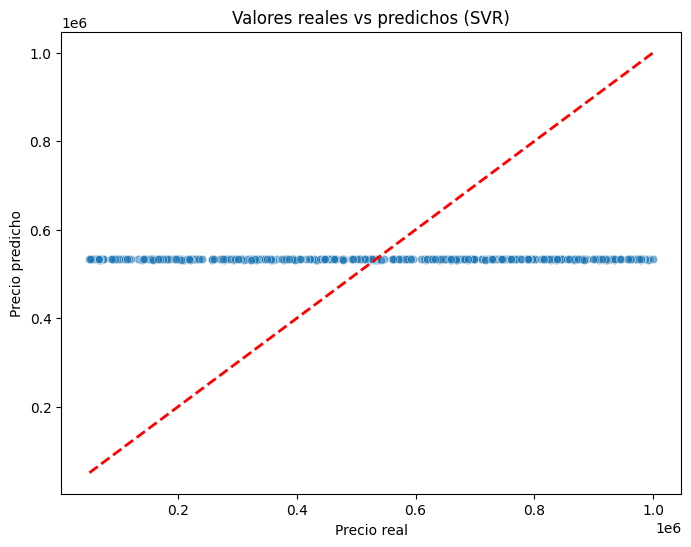

In [ ]:
# 9. Visualización de resultados

# Comparación entre los reales y los que dice el modelo
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Valores reales vs predichos (SVR)")
plt.show()

Error absoluto medio (MAE): 242642.11075614486


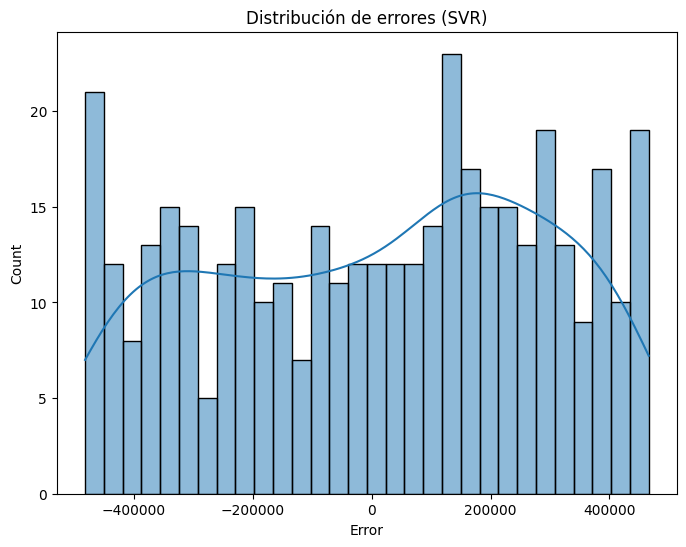

In [ ]:
# 10. Análisis

# Cálculo del error absoluto medio
mae = np.mean(np.abs(y_test - y_pred))
print("Error absoluto medio (MAE):", mae)

# Errores distribuidos
errors = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Error")
plt.title("Distribución de errores (SVR)")
plt.show()